# Programming Assignment: 
## Готовим LDA по рецептам

Как вы уже знаете, в тематическом моделировании делается предположение о том, что для определения тематики порядок слов в документе не важен; об этом гласит гипотеза «мешка слов». Сегодня мы будем работать с несколько нестандартной для тематического моделирования коллекцией, которую можно назвать «мешком ингредиентов», потому что на состоит из рецептов блюд разных кухонь. Тематические модели ищут слова, которые часто вместе встречаются в документах, и составляют из них темы. Мы попробуем применить эту идею к рецептам и найти кулинарные «темы». Эта коллекция хороша тем, что не требует предобработки. Кроме того, эта задача достаточно наглядно иллюстрирует принцип работы тематических моделей.

Для выполнения заданий, помимо часто используемых в курсе библиотек, потребуются модули *json* и *gensim*. Первый входит в дистрибутив Anaconda, второй можно поставить командой 

*pip install gensim*

Построение модели занимает некоторое время. На ноутбуке с процессором Intel Core i7 и тактовой частотой 2400 МГц на построение одной модели уходит менее 10 минут.

### Загрузка данных

Коллекция дана в json-формате: для каждого рецепта известны его id, кухня (cuisine) и список ингредиентов, в него входящих. Загрузить данные можно с помощью модуля json (он входит в дистрибутив Anaconda):

In [1]:
import json

In [101]:
with open("recipes.json") as f:
    recipes = json.load(f)

In [102]:
print recipes[0]

{u'cuisine': u'greek', u'id': 10259, u'ingredients': [u'romaine lettuce', u'black olives', u'grape tomatoes', u'garlic', u'pepper', u'purple onion', u'seasoning', u'garbanzo beans', u'feta cheese crumbles']}


### Составление корпуса

In [4]:
from gensim import corpora, models
import numpy as np

Наша коллекция небольшая, и целиком помещается в оперативную память. Gensim может работать с такими данными и не требует их сохранения на диск в специальном формате. Для этого коллекция должна быть представлена в виде списка списков, каждый внутренний список соответствует отдельному документу и состоит из его слов. Пример коллекции из двух документов: 

[["hello", "world"], ["programming", "in", "python"]]

Преобразуем наши данные в такой формат, а затем создадим объекты corpus и dictionary, с которыми будет работать модель.

In [112]:
texts = [recipe["ingredients"] for recipe in recipes]
dictionary = corpora.Dictionary(texts)   # составляем словарь
corpus = [dictionary.doc2bow(text) for text in texts]  # составляем корпус документов

In [104]:
print texts[0]
print corpus[0]

[u'romaine lettuce', u'black olives', u'grape tomatoes', u'garlic', u'pepper', u'purple onion', u'seasoning', u'garbanzo beans', u'feta cheese crumbles']
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]


У объекта dictionary есть полезная переменная dictionary.token2id, позволяющая находить соответствие между ингредиентами и их индексами.

### Обучение модели
Вам может понадобиться [документация](https://radimrehurek.com/gensim/models/ldamodel.html) LDA в gensim.

__Задание 1.__ Обучите модель LDA с 40 темами, установив количество проходов по коллекции 5 и оставив остальные параметры по умолчанию. 


Затем вызовите метод модели *show_topics*, указав количество тем 40 и количество токенов 10, и сохраните результат (топы ингредиентов в темах) в отдельную переменную. Если при вызове метода *show_topics* указать параметр *formatted=True*, то топы ингредиентов будет удобно выводить на печать, если *formatted=False*, будет удобно работать со списком программно. Выведите топы на печать, рассмотрите темы, а затем ответьте на вопрос:

Сколько раз ингредиенты "salt", "sugar", "water", "mushrooms", "chicken", "eggs" встретились среди топов-10 всех 40 тем? При ответе __не нужно__ учитывать составные ингредиенты, например, "hot water".

Передайте 6 чисел в функцию save_answers1 и загрузите сгенерированный файл в форму.

У gensim нет возможности фиксировать случайное приближение через параметры метода, но библиотека использует numpy для инициализации матриц. Поэтому, по утверждению автора библиотеки, фиксировать случайное приближение нужно командой, которая написана в следующей ячейке. __Перед строкой кода с построением модели обязательно вставляйте указанную строку фиксации random.seed.__

In [7]:
np.random.seed(76543)
# здесь код для построения модели:
ldamodel = models.ldamodel.LdaModel(corpus,id2word=dictionary,num_topics=40,passes=5)

In [41]:
top_words_in_topics = ldamodel.show_topics(num_topics=40,num_words=10,formatted=False)

In [48]:
list_word = ["salt", "sugar", "water", "mushrooms", "chicken", "eggs"]
list_sc =[0,0,0,0,0,0]
for topic in top_words_in_topics:
    for i in range(10):
        for j in range(len(list_word)):
            if topic[1][i][0]==list_word[j]: 
                list_sc[j] += 1
for i in range(len(list_word)):
    print list_word[i], ":", list_sc[i]

salt : 23
sugar : 9
water : 8
mushrooms : 1
chicken : 0
eggs : 2


In [49]:
def save_answers1(c_salt, c_sugar, c_water, c_mushrooms, c_chicken, c_eggs):
    with open("cooking_LDA_pa_task1.txt", "w") as fout:
        fout.write(" ".join([str(el) for el in [c_salt, c_sugar, c_water, c_mushrooms, c_chicken, c_eggs]]))

In [50]:
c_salt = list_sc[0]
c_sugar = list_sc[1]
c_water = list_sc[2]
c_mushrooms = list_sc[3]
c_chicken = list_sc[4]
c_eggs = list_sc[5]
save_answers1(c_salt, c_sugar, c_water, c_mushrooms, c_chicken, c_eggs)

### Фильтрация словаря
В топах тем гораздо чаще встречаются первые три рассмотренных ингредиента, чем последние три. При этом наличие в рецепте курицы, яиц и грибов яснее дает понять, что мы будем готовить, чем наличие соли, сахара и воды. Таким образом, даже в рецептах есть слова, часто встречающиеся в текстах и не несущие смысловой нагрузки, и поэтому их не желательно видеть в темах. Наиболее простой прием борьбы с такими фоновыми элементами — фильтрация словаря по частоте. Обычно словарь фильтруют с двух сторон: убирают очень редкие слова (в целях экономии памяти) и очень частые слова (в целях повышения интерпретируемости тем). Мы уберем только частые слова.

In [113]:
import copy
dictionary2 = copy.deepcopy(dictionary)

__Задание 2.__ У объекта dictionary2 есть переменная *dfs* — это словарь, ключами которого являются id токена, а элементами — число раз, сколько слово встретилось во всей коллекции. Сохраните в отдельный список ингредиенты, которые встретились в коллекции больше 4000 раз. Вызовите метод словаря *filter_tokens*, подав в качестве первого аргумента полученный список популярных ингредиентов. Вычислите две величины: dict_size_before и dict_size_after — размер словаря до и после фильтрации.

Затем, используя новый словарь, создайте новый корпус документов, corpus2, по аналогии с тем, как это сделано в начале ноутбука. Вычислите две величины: corpus_size_before и corpus_size_after — суммарное количество ингредиентов в корпусе (для каждого документа вычислите число различных ингредиентов в нем и просуммируйте по всем документам) до и после фильтрации.

Передайте величины dict_size_before, dict_size_after, corpus_size_before, corpus_size_after в функцию save_answers2 и загрузите сгенерированный файл в форму.

In [114]:
pop_ingr = list()
for word in dictionary2.dfs:
    if dictionary2.dfs[word]>4000:
        pop_ingr.append(word)
# print word, dictionary2[word], dictionary2.dfs[word]
print pop_ingr

[3, 5, 11, 15, 18, 20, 29, 44, 52, 59, 104, 114]


In [115]:
dict_size_before = len(dictionary2)
print dict_size_before

dictionary_after = dictionary2
dictionary_after.filter_tokens(bad_ids=pop_ingr)
dict_size_after = len(dictionary_after)
print dict_size_after

6714
6702


In [117]:
corpus2 = [dictionary_after.doc2bow(text) for text in texts]  # составляем корпус документов

In [127]:
corpus_size_after=0
for doc in range(len(corpus2)):
        corpus_size_after += len(dict(corpus2[doc])) 
print corpus_size_after

corpus_size_before=0
for doc in range(len(corpus)):
        corpus_size_before += len(corpus[doc]) 
print corpus_size_before

343665
428249


In [128]:
def save_answers2(dict_size_before, dict_size_after, corpus_size_before, corpus_size_after):
    with open("cooking_LDA_pa_task2.txt", "w") as fout:
        fout.write(" ".join([str(el) for el in [dict_size_before, dict_size_after, corpus_size_before, corpus_size_after]]))

In [129]:
save_answers2(dict_size_before, dict_size_after, corpus_size_before, corpus_size_after)

### Сравнение когерентностей
__Задание 3.__ Постройте еще одну модель по корпусу corpus2 и словарю dictionary2, остальные параметры оставьте такими же, как при первом построении модели. Сохраните новую модель в другую переменную (не перезаписывайте предыдущую модель). Не забудьте про фиксирование seed!

Затем воспользуйтесь методом *top_topics* модели, чтобы вычислить ее когерентность. Передайте в качестве аргумента соответствующий модели корпус. Метод вернет список кортежей (топ токенов, когерентность), отсортированных по убыванию последней. Вычислите среднюю по всем темам когерентность для каждой из двух моделей и передайте в функцию save_answers3. 

In [130]:
np.random.seed(76543)
# здесь код для построения модели:
ldamodel_2 = models.ldamodel.LdaModel(corpus2,id2word=dictionary2,num_topics=40,passes=5)

In [142]:
temp1 = ldamodel.top_topics(corpus=corpus)
p=0
for i in range(len(temp1)):
               p += temp1[i][1]
kog = p/len(temp1)
print kog

-6.328161196706938


In [143]:
temp2 = ldamodel_2.top_topics(corpus=corpus2)
p=0
for i in range(len(temp2)):
               p += temp2[i][1]
kog_after = p/len(temp2)
print kog_after

-8.709553089799611


In [144]:
def save_answers3(coherence, coherence2):
    with open("cooking_LDA_pa_task3.txt", "w") as fout:
        fout.write(" ".join(["%3f"%el for el in [coherence, coherence2]]))
save_answers3(kog, kog_after)

Считается, что когерентность хорошо соотносится с человеческими оценками интерпретируемости тем. Поэтому на больших текстовых коллекциях когерентность обычно повышается, если убрать фоновую лексику. Однако в нашем случае этого не произошло. 

### Изучение влияния гиперпараметра alpha

В этом разделе мы будем работать со второй моделью, то есть той, которая построена по сокращенному корпусу. 

Пока что мы посмотрели только на матрицу темы-слова, теперь давайте посмотрим на матрицу темы-документы. Выведите темы для нулевого (или любого другого) документа из корпуса, воспользовавшись методом *get_document_topics* второй модели:

In [149]:
ldamodel_2.get_document_topics(corpus2[0])

[(25, 0.12812187), (31, 0.6171403), (33, 0.13910952)]

Также выведите содержимое переменной *.alpha* второй модели:

In [151]:
ldamodel_2.alpha

array([0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,
       0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,
       0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,
       0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,
       0.025, 0.025, 0.025, 0.025], dtype=float32)

У вас должно получиться, что документ характеризуется небольшим числом тем. Попробуем поменять гиперпараметр alpha, задающий априорное распределение Дирихле для распределений тем в документах.

__Задание 4.__ Обучите третью модель: используйте сокращенный корпус (corpus2 и dictionary2) и установите параметр __alpha=1__, passes=5. Не забудьте про фиксацию seed! Выведите темы новой модели для нулевого документа; должно получиться, что распределение над множеством тем практически равномерное. Чтобы убедиться в том, что во второй модели документы описываются гораздо более разреженными распределениями, чем в третьей, посчитайте суммарное количество элементов, __превосходящих 0.01__, в матрицах темы-документы обеих моделей. Другими словами, запросите темы  модели для каждого документа с параметром *minimum_probability=0.01* и просуммируйте число элементов в получаемых массивах. Передайте две суммы (сначала для модели с alpha по умолчанию, затем для модели в alpha=1) в функцию save_answers4.

In [152]:
np.random.seed(76543)
# здесь код для построения модели:
ldamodel_3 = models.ldamodel.LdaModel(corpus2,id2word=dictionary2,num_topics=40, alpha=1, passes=5)

In [153]:
ldamodel_3.get_document_topics(corpus2[0])

[(0, 0.021391904),
 (1, 0.021293541),
 (2, 0.021276835),
 (3, 0.02136119),
 (4, 0.021292934),
 (5, 0.02130553),
 (6, 0.021300681),
 (7, 0.021279465),
 (8, 0.021389356),
 (9, 0.02136992),
 (10, 0.02182393),
 (11, 0.021466272),
 (12, 0.021276835),
 (13, 0.022181718),
 (14, 0.021689484),
 (15, 0.021493444),
 (16, 0.021389863),
 (17, 0.021952787),
 (18, 0.021316724),
 (19, 0.021639956),
 (20, 0.024820212),
 (21, 0.021277018),
 (22, 0.021276835),
 (23, 0.021283476),
 (24, 0.021748234),
 (25, 0.021486124),
 (26, 0.02144737),
 (27, 0.0216133),
 (28, 0.021488655),
 (29, 0.021300064),
 (30, 0.042602763),
 (31, 0.09227165),
 (32, 0.02149174),
 (33, 0.021277985),
 (34, 0.021429565),
 (35, 0.021356417),
 (36, 0.021325927),
 (37, 0.021286672),
 (38, 0.021277493),
 (39, 0.06844614)]

In [177]:
s2=0
for doc in corpus2:
    s2+=len(ldamodel_2.get_document_topics(doc, minimum_probability=0.01))
print s2

203851


In [176]:
s3=0
for doc in corpus2:
    s3+=len(ldamodel_3.get_document_topics(doc, minimum_probability=0.01))
print s3

1590960


In [179]:
def save_answers4(count_model2, count_model3):
    with open("cooking_LDA_pa_task4.txt", "w") as fout:
        fout.write(" ".join([str(el) for el in [count_model2, count_model3]]))
save_answers4(s2, s3)

Таким образом, гиперпараметр __alpha__ влияет на разреженность распределений тем в документах. Аналогично гиперпараметр __eta__ влияет на разреженность распределений слов в темах.

### LDA как способ понижения размерности
Иногда, распределения над темами, найденные с помощью LDA, добавляют в матрицу объекты-признаки как дополнительные, семантические, признаки, и это может улучшить качество решения задачи. Для простоты давайте просто обучим классификатор рецептов на кухни на признаках, полученных из LDA, и измерим точность (accuracy).

__Задание 5.__ Используйте модель, построенную по сокращенной выборке с alpha по умолчанию (вторую модель). Составьте матрицу $\Theta = p(t|d)$ вероятностей тем в документах; вы можете использовать тот же метод get_document_topics, а также вектор правильных ответов y (в том же порядке, в котором рецепты идут в переменной recipes). Создайте объект RandomForestClassifier со 100 деревьями, с помощью функции cross_val_score вычислите среднюю accuracy по трем фолдам (перемешивать данные не нужно) и передайте в функцию save_answers5.

In [181]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [209]:
theta = (ldamodel_2.get_document_topics(corpus2[0],minimum_probability = 0))
THETA = np.array(list(map(lambda x: x[1], theta)))
print theta
print THETA
for i in range(1,len(corpus2)):
    THETA = np.vstack((THETA,np.array(list(map(lambda x: x[1], ldamodel_2.get_document_topics(corpus2[i],minimum_probability = 0))))))

[(0, 0.0031250895), (1, 0.0031250895), (2, 0.0031250895), (3, 0.0031250895), (4, 0.0031250895), (5, 0.0031250895), (6, 0.0031250895), (7, 0.0031250895), (8, 0.0031250895), (9, 0.0031250895), (10, 0.0031250895), (11, 0.0031250895), (12, 0.0031250895), (13, 0.0031250895), (14, 0.0031250895), (15, 0.0031250895), (16, 0.0031250895), (17, 0.0031250895), (18, 0.0031250895), (19, 0.0031250895), (20, 0.0031250895), (21, 0.0031250895), (22, 0.0031250895), (23, 0.0031250895), (24, 0.0031250895), (25, 0.12812187), (26, 0.0031250895), (27, 0.0031250895), (28, 0.0031250895), (29, 0.0031250895), (30, 0.0031250895), (31, 0.6171488), (32, 0.0031250895), (33, 0.139101), (34, 0.0031250895), (35, 0.0031250895), (36, 0.0031250895), (37, 0.0031250895), (38, 0.0031250895), (39, 0.0031250895)]
[0.00312509 0.00312509 0.00312509 0.00312509 0.00312509 0.00312509
 0.00312509 0.00312509 0.00312509 0.00312509 0.00312509 0.00312509
 0.00312509 0.00312509 0.00312509 0.00312509 0.00312509 0.00312509
 0.00312509 0.003

In [216]:
y = [recipe["cuisine"] for recipe in recipes]

In [219]:
rf = RandomForestClassifier(n_estimators=100)
cv_score = cross_val_score(rf,THETA,y,scoring='accuracy',cv=3)

In [224]:
accuracy=np.mean(cv_score)

In [225]:
def save_answers5(accuracy):
     with open("cooking_LDA_pa_task5.txt", "w") as fout:
        fout.write(str(accuracy))

In [226]:
save_answers5(accuracy)

Для такого большого количества классов это неплохая точность. Вы можете попроовать обучать RandomForest на исходной матрице частот слов, имеющей значительно большую размерность, и увидеть, что accuracy увеличивается на 10–15%. Таким образом, LDA собрал не всю, но достаточно большую часть информации из выборки, в матрице низкого ранга.

### LDA — вероятностная модель
Матричное разложение, использующееся в LDA, интерпретируется как следующий процесс генерации документов.

Для документа $d$ длины $n_d$:
1. Из априорного распределения Дирихле с параметром alpha сгенерировать распределение над множеством тем: $\theta_d \sim Dirichlet(\alpha)$
1. Для каждого слова $w = 1, \dots, n_d$:
    1. Сгенерировать тему из дискретного распределения $t \sim \theta_{d}$
    1. Сгенерировать слово из дискретного распределения $w \sim \phi_{t}$.
    
Подробнее об этом в [Википедии](https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation).

В контексте нашей задачи получается, что, используя данный генеративный процесс, можно создавать новые рецепты. Вы можете передать в функцию модель и число ингредиентов и сгенерировать рецепт :)

In [246]:
def generate_recipe(model, num_ingredients):
    theta = np.random.dirichlet(model.alpha)
    for i in range(num_ingredients):
        t = np.random.choice(np.arange(model.num_topics), p=theta)
        topic = model.show_topic(t, topn=model.num_terms)
        topic_distr = [x[1] for x in topic]
        terms = [x[0] for x in topic]
        print np.array(topic_distr).sum().astype(float)
        topic_distr = np.array(topic_distr)
        topic_distr /= topic_distr.sum().astype(float)
        w = np.random.choice(terms, p=topic_distr)
        print w

In [247]:
generate_recipe(ldamodel_2,10)

1.0000001192092896
corn tortillas
1.0000001192092896
lime juice
1.0000001192092896
purple onion
1.0000001192092896
cilantro
1.0000001192092896
ground cumin
1.0000001192092896
shredded lettuce
1.0000001192092896
lime
1.0000001192092896
chile powder
1.0000001192092896
tomatillos
1.0000001192092896
lime juice


### Интерпретация построенной модели
Вы можете рассмотреть топы ингредиентов каждой темы. Большиснтво тем сами по себе похожи на рецепты; в некоторых собираются продукты одного вида, например, свежие фрукты или разные виды сыра.

Попробуем эмпирически соотнести наши темы с национальными кухнями (cuisine). Построим матрицу $A$ размера темы $x$ кухни, ее элементы $a_{tc}$ — суммы $p(t|d)$ по всем документам $d$, которые отнесены к кухне $c$. Нормируем матрицу на частоты рецептов по разным кухням, чтобы избежать дисбаланса между кухнями. Следующая функция получает на вход объект модели, объект корпуса и исходные данные и возвращает нормированную матрицу $A$. Ее удобно визуализировать с помощью seaborn.

In [248]:
import pandas
import seaborn
from matplotlib import pyplot as plt
%matplotlib inline

In [249]:
def compute_topic_cuisine_matrix(model, corpus, recipes):
    # составляем вектор целевых признаков
    targets = list(set([recipe["cuisine"] for recipe in recipes]))
    # составляем матрицу
    tc_matrix = pandas.DataFrame(data=np.zeros((model.num_topics, len(targets))), columns=targets)
    for recipe, bow in zip(recipes, corpus):
        recipe_topic = model.get_document_topics(bow)
        for t, prob in recipe_topic:
            tc_matrix[recipe["cuisine"]][t] += prob
    # нормируем матрицу
    target_sums = pandas.DataFrame(data=np.zeros((1, len(targets))), columns=targets)
    for recipe in recipes:
        target_sums[recipe["cuisine"]] += 1
    return pandas.DataFrame(tc_matrix.values/target_sums.values, columns=tc_matrix.columns)

In [250]:
def plot_matrix(tc_matrix):
    plt.figure(figsize=(10, 10))
    seaborn.heatmap(tc_matrix, square=True)

In [251]:
# Визуализируйте матрицу
tc_matrix = compute_topic_cuisine_matrix(ldamodel_2, corpus2, recipes)

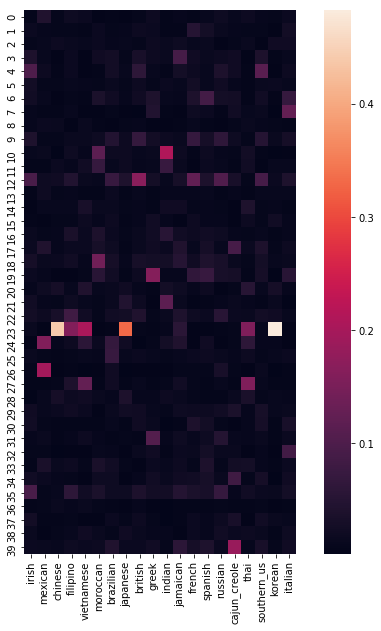

In [252]:
plot_matrix(tc_matrix)

Чем темнее квадрат в матрице, тем больше связь этой темы с данной кухней. Мы видим, что у нас есть темы, которые связаны с несколькими кухнями. Такие темы показывают набор ингредиентов, которые популярны в кухнях нескольких народов, то есть указывают на схожесть кухонь этих народов. Некоторые темы распределены по всем кухням равномерно, они показывают наборы продуктов, которые часто используются в кулинарии всех стран. 

Жаль, что в датасете нет названий рецептов, иначе темы было бы проще интерпретировать...

### Заключение
В этом задании вы построили несколько моделей LDA, посмотрели, на что влияют гиперпараметры модели и как можно использовать построенную модель. 